In [138]:
import pandas as pd

df = pd.read_csv('travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


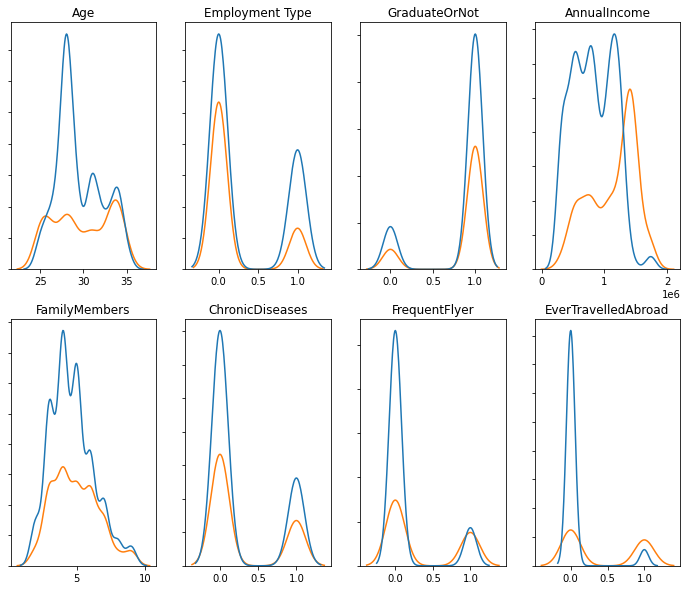

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, sharey=False, sharex=False, figsize=(12,10))
col = df.columns.to_list()
k=0

for i in range(2):
    for j in range(4):
        sns.kdeplot(ax=ax[i,j], data=df, x=col[k], hue='TravelInsurance', legend=False)\
        .set(ylabel=None, xlabel=None, yticklabels=[], title=col[k])
        k+=1

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

df_train, df_test = train_test_split(df, test_size=0.25, random_state=1)

# Segregate features and labels into separate variables
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:,[-1]].values
X_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)
y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.7847082494969819


c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[295,  22],
       [ 85,  95]], dtype=int64)

In [128]:
coef = logreg.coef_.tolist()[0]
columns = df.columns.to_list()

coefs = {i: j for i,j in zip(columns, coef)}
coefs

{'Age': 0.6599850124354251,
 'GraduateOrNot': -0.13389510315621939,
 'AnnualIncome': 2.325099490750935,
 'FamilyMembers': 1.0722726639064069,
 'ChronicDiseases': 0.12778417672678738,
 'FrequentFlyer': 0.43254331324413736,
 'EverTravelledAbroad': 1.565871165004691,
 'Employment Type_Government Sector': -0.07925666914160905,
 'Employment Type_Private Sector/Self Employed': 0.07935433593724005}